Data Found at Following Link: https://repository.library.northeastern.edu/files/neu:gm80mp276

In [1]:
import pandas as pd
import torch
from time import perf_counter
import os
import random
from tqdm import tqdm
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

### Load Data from GlobecmPOWDER dataset

In [1]:
from Processor import  POWDERRF_Processor
import os

task = ["transmitter", "protocol", "joint"]
task_i = 2
datadir = "GlobecomPOWDER/";
savedir = "rf_results_" + task[task_i];

if os.path.isdir(savedir) != True:
    os.mkdir(savedir);

print(os.path.isdir(datadir))
print(os.path.isdir(savedir))

processor = POWDERRF_Processor(datadir = datadir, sample_len = 1024 , max_samples = 50000, savedir = savedir)
xtrain, ytrain, xtest, ytest = processor(train_test_split=.8, task = task[task_i]);

True
True


100%|█████████████████████████████████████████████████████████████████████████████████| 120/120 [00:18<00:00,  6.37it/s]


### Train model

In [2]:
from Modeling import Conv1D_RF_Classifier
from train import train

model = Conv1D_RF_Classifier(classes =4)# 4 classes for transmitter, 4 classes for protocol, and 12 for joint
model = train(model = model, xtrain = xtrain, ytrain = ytrain,  batch_sz = 256, lr = 0.001 ,epochs = 25, savepath = savedir, device = "cuda")

Epoch: 0


47it [00:00, 84.33it/s]

avg loss: 1.326778130531311


70it [00:00, 98.58it/s]

avg loss: 1.0902728760242462


93it [00:01, 105.70it/s]

avg loss: 0.8912319608529409


117it [00:01, 109.24it/s]

avg loss: 0.7447391484677791


141it [00:01, 109.11it/s]

avg loss: 0.6374559820890426


149it [00:01, 87.87it/s] 


Val acc: 0.9505
Epoch: 1


11it [00:00, 109.01it/s]

avg loss: 0.5562116607030233


47it [00:00, 108.95it/s]

avg loss: 0.4957401759709631


70it [00:00, 110.84it/s]

avg loss: 0.4479285695403814


94it [00:00, 112.06it/s]

avg loss: 0.41373494694630303


118it [00:01, 109.77it/s]

avg loss: 0.3822976232767105


141it [00:01, 110.97it/s]

avg loss: 0.35538512393832206


149it [00:01, 110.64it/s]


Val acc: 0.9735
Epoch: 2


11it [00:00, 104.57it/s]

avg loss: 0.3316308898975452


46it [00:00, 110.30it/s]

avg loss: 0.31137032937545045


70it [00:00, 111.93it/s]

avg loss: 0.29320064605346746


94it [00:00, 109.55it/s]

avg loss: 0.2770430833026767


117it [00:01, 111.30it/s]

avg loss: 0.26275248163146897


149it [00:01, 110.56it/s]

avg loss: 0.24983139726388104


Val acc: 0.9875
Epoch: 3


11it [00:00, 103.06it/s]

avg loss: 0.238245077100065


47it [00:00, 111.81it/s]

avg loss: 0.22767095626822034


71it [00:00, 110.30it/s]

avg loss: 0.21802444030577317


95it [00:00, 111.28it/s]

avg loss: 0.2094920140101264


119it [00:01, 111.90it/s]

avg loss: 0.2011919260080057


149it [00:01, 110.31it/s]

avg loss: 0.1935898282253386


Val acc: 0.9935
Epoch: 4


11it [00:00, 109.51it/s]

avg loss: 0.18664026389868618


47it [00:00, 112.95it/s]

avg loss: 0.18011839520931244


71it [00:00, 109.56it/s]

avg loss: 0.17440026293007227


94it [00:00, 111.21it/s]

avg loss: 0.16903821376324804


118it [00:01, 111.35it/s]

avg loss: 0.16377565388933624


149it [00:01, 110.77it/s]


avg loss: 0.1589959884585877
Val acc: 0.992
Epoch: 5


23it [00:00, 113.03it/s]

avg loss: 0.15429993956691276


47it [00:00, 110.59it/s]

avg loss: 0.14984386649914086


71it [00:00, 110.61it/s]

avg loss: 0.14577848220695158


95it [00:00, 111.84it/s]

avg loss: 0.1420552661296714


119it [00:01, 109.77it/s]

avg loss: 0.13845658091595398


149it [00:01, 111.00it/s]


avg loss: 0.1349095943590094
Val acc: 0.994
Epoch: 6


23it [00:00, 110.08it/s]

avg loss: 0.13162134781816145


47it [00:00, 109.53it/s]

avg loss: 0.12849289868152827


70it [00:00, 111.48it/s]

avg loss: 0.12542517138626672


94it [00:00, 109.30it/s]

avg loss: 0.1224972602000866


118it [00:01, 110.74it/s]

avg loss: 0.11995972354459809


149it [00:01, 110.28it/s]


avg loss: 0.11752781544863133
Val acc: 0.9945
Epoch: 7


23it [00:00, 110.55it/s]

avg loss: 0.11503499996349481


47it [00:00, 111.09it/s]

avg loss: 0.11270114346943406


71it [00:00, 110.01it/s]

avg loss: 0.11048570693190082


95it [00:00, 111.61it/s]

avg loss: 0.10838516017065072


119it [00:01, 110.44it/s]

avg loss: 0.10629510062296227


149it [00:01, 110.64it/s]


avg loss: 0.10445248897380612
Val acc: 0.9965
Epoch: 8


23it [00:00, 111.54it/s]

avg loss: 0.10256704748642126


47it [00:00, 109.82it/s]

avg loss: 0.1006860167148751


70it [00:00, 111.49it/s]

avg loss: 0.09894497154592537


94it [00:00, 108.76it/s]

avg loss: 0.09740062123214753


130it [00:01, 112.01it/s]

avg loss: 0.09571408595527128


149it [00:01, 110.58it/s]


avg loss: 0.0941368072523015
Val acc: 0.9945
Epoch: 9


23it [00:00, 110.59it/s]

avg loss: 0.09258601231735493


47it [00:00, 112.19it/s]

avg loss: 0.09114234685161236


71it [00:00, 109.48it/s]

avg loss: 0.08971293072207898


95it [00:00, 110.57it/s]

avg loss: 0.08839048331505374


119it [00:01, 109.99it/s]

avg loss: 0.0869962901698329


149it [00:01, 110.66it/s]


avg loss: 0.08565813264367565
Val acc: 0.9965
Epoch: 10


23it [00:00, 113.23it/s]

avg loss: 0.08438987070593673


47it [00:00, 112.07it/s]

avg loss: 0.08322700797396972


71it [00:00, 109.47it/s]

avg loss: 0.08200552696538639


107it [00:00, 111.60it/s]

avg loss: 0.08094061396594736


131it [00:01, 110.06it/s]

avg loss: 0.07977188334438325


149it [00:01, 111.08it/s]


avg loss: 0.07868678956688381
Val acc: 0.9945
Epoch: 11


24it [00:00, 112.96it/s]

avg loss: 0.07762963402464237


48it [00:00, 109.64it/s]

avg loss: 0.07663943315589446


72it [00:00, 111.19it/s]

avg loss: 0.07560026662805125


96it [00:00, 110.28it/s]

avg loss: 0.07464628202348873


132it [00:01, 111.69it/s]

avg loss: 0.07370666483411333


149it [00:01, 111.25it/s]


avg loss: 0.072816044436284
Val acc: 0.9955
Epoch: 12


24it [00:00, 108.20it/s]

avg loss: 0.07201259757444657


48it [00:00, 110.52it/s]

avg loss: 0.07114508454774807


72it [00:00, 111.59it/s]

avg loss: 0.07031949045868886


108it [00:00, 110.66it/s]

avg loss: 0.06953568271810655


132it [00:01, 111.78it/s]

avg loss: 0.06876119073954454


149it [00:01, 110.49it/s]


avg loss: 0.06796944164676295
Val acc: 0.998
Epoch: 13


24it [00:00, 111.59it/s]

avg loss: 0.06719405538136086


60it [00:00, 111.97it/s]

avg loss: 0.06645911785120386


84it [00:00, 110.91it/s]

avg loss: 0.06578476190826768


108it [00:00, 112.05it/s]

avg loss: 0.06506635436527344


132it [00:01, 111.11it/s]

avg loss: 0.06438568998049382


149it [00:01, 111.16it/s]


avg loss: 0.06370443457614838
Val acc: 0.996
Epoch: 14


36it [00:00, 113.46it/s]

avg loss: 0.0630612802554346


60it [00:00, 110.44it/s]

avg loss: 0.06245229680058272


84it [00:00, 111.93it/s]

avg loss: 0.061835705407267044


108it [00:00, 112.03it/s]

avg loss: 0.06119412385679289


132it [00:01, 110.40it/s]

avg loss: 0.06058527584965553


149it [00:01, 111.27it/s]


avg loss: 0.059969196179319235
Val acc: 0.997
Epoch: 15


36it [00:00, 110.85it/s]

avg loss: 0.05940675358201326


60it [00:00, 111.29it/s]

avg loss: 0.05883787667991563


84it [00:00, 112.41it/s]

avg loss: 0.05825580388402475


108it [00:00, 111.20it/s]

avg loss: 0.057766465036741765


132it [00:01, 111.17it/s]

avg loss: 0.05724584082540303


149it [00:01, 111.34it/s]


avg loss: 0.05670458405908491
Val acc: 0.9985
Epoch: 16


36it [00:00, 109.55it/s]

avg loss: 0.0562178025524554


59it [00:00, 111.40it/s]

avg loss: 0.055689876303016736


83it [00:00, 112.53it/s]

avg loss: 0.05523695348317697


107it [00:00, 109.92it/s]

avg loss: 0.05473226441500821


131it [00:01, 111.67it/s]

avg loss: 0.05426459973007441


149it [00:01, 111.16it/s]


avg loss: 0.053812704909383086
Val acc: 0.9985
Epoch: 17


36it [00:00, 110.26it/s]

avg loss: 0.053328283269688206


60it [00:00, 112.07it/s]

avg loss: 0.052850221456240444


84it [00:00, 111.40it/s]

avg loss: 0.05243307966576909


108it [00:00, 110.33it/s]

avg loss: 0.05198047612218042


132it [00:01, 111.82it/s]

avg loss: 0.05153830252994425


149it [00:01, 110.90it/s]


avg loss: 0.05107870448645907
Val acc: 0.9975
Epoch: 18


36it [00:00, 112.44it/s]

avg loss: 0.05064850606480225


60it [00:00, 112.16it/s]

avg loss: 0.05023462396618107


84it [00:00, 110.18it/s]

avg loss: 0.04997029647012294


108it [00:00, 111.72it/s]

avg loss: 0.04986965201112603


132it [00:01, 112.48it/s]

avg loss: 0.04960350808960097


149it [00:01, 110.72it/s]


avg loss: 0.0493929407913552
Val acc: 0.993
Epoch: 19


36it [00:00, 113.51it/s]

avg loss: 0.04912132558865491


60it [00:00, 110.04it/s]

avg loss: 0.04880493352621156


84it [00:00, 111.67it/s]

avg loss: 0.04846721018842424


108it [00:00, 111.92it/s]

avg loss: 0.04808592554299971


132it [00:01, 110.33it/s]

avg loss: 0.047709382071576115


149it [00:01, 111.14it/s]


avg loss: 0.04735610247771608
Val acc: 1.0
Epoch: 20


36it [00:00, 109.71it/s]

avg loss: 0.046985134851158364


59it [00:00, 111.78it/s]

avg loss: 0.04662159564985686


83it [00:00, 111.49it/s]

avg loss: 0.04628470812375528


107it [00:00, 110.32it/s]

avg loss: 0.045944342305203494


131it [00:01, 111.24it/s]

avg loss: 0.04564709715640821


149it [00:01, 110.54it/s]


avg loss: 0.04532921979723615
Val acc: 0.9985
Epoch: 21


36it [00:00, 113.11it/s]

avg loss: 0.045013369276798804


60it [00:00, 111.57it/s]

avg loss: 0.04469150246899517


84it [00:00, 110.71it/s]

avg loss: 0.04436439736253533


108it [00:00, 112.09it/s]

avg loss: 0.04406370498239543


132it [00:01, 111.13it/s]

avg loss: 0.04375667124641992


149it [00:01, 110.99it/s]


avg loss: 0.0434532243279171
Val acc: 0.9985
Epoch: 22


36it [00:00, 113.74it/s]

avg loss: 0.0431630177836004


60it [00:00, 110.35it/s]

avg loss: 0.04290702843077413


84it [00:00, 111.42it/s]

avg loss: 0.042630107819028644


108it [00:00, 111.94it/s]

avg loss: 0.04235035602660975


144it [00:01, 110.68it/s]

avg loss: 0.04208632805279836


149it [00:01, 111.02it/s]


avg loss: 0.04180285685627728
Val acc: 0.999
Epoch: 23


36it [00:00, 113.75it/s]

avg loss: 0.04153213875182648


60it [00:00, 110.63it/s]

avg loss: 0.041256027267148665


84it [00:00, 111.07it/s]

avg loss: 0.04102264572739659


120it [00:01, 111.98it/s]

avg loss: 0.04079409930999316


144it [00:01, 110.57it/s]

avg loss: 0.040538038546797446


149it [00:01, 111.26it/s]


avg loss: 0.040286345337828953
Val acc: 1.0
Epoch: 24


36it [00:00, 113.58it/s]

avg loss: 0.040082401184392644


60it [00:00, 109.84it/s]

avg loss: 0.03983940651271179


96it [00:00, 112.09it/s]

avg loss: 0.03961518372811715


120it [00:01, 111.47it/s]

avg loss: 0.039404828764290745


144it [00:01, 110.64it/s]

avg loss: 0.03918290338690968


149it [00:01, 111.17it/s]

avg loss: 0.03894016671003299
Val acc: 0.996


### Visualize model training performance and time

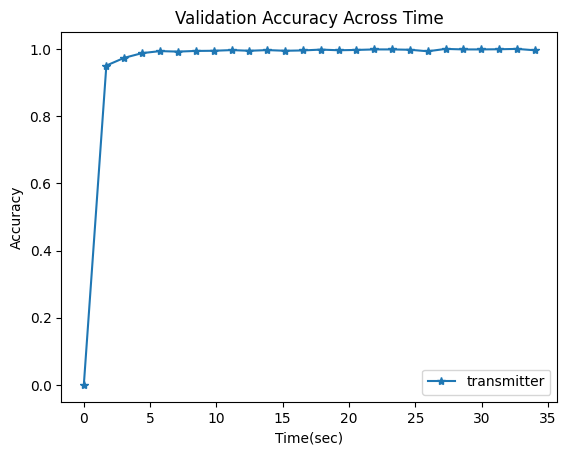

In [3]:
import json
import matplotlib.pyplot as plt

train_history_path  = savedir + "/train_history.json";
with open(train_history_path, "r") as f:
    train_history = json.load(f);
time = [0];
val_acc = [0];
for epoch in train_history.keys():
    time.append(train_history[epoch]['time'])
    val_acc.append(train_history[epoch]["val_acc"]);
plt.plot(time, val_acc, marker = "*", label = "transmitter");


plt.title("Validation Accuracy Across Time")
plt.xlabel("Time(sec)")
plt.ylabel("Accuracy")
plt.legend();
plt.savefig("val_time_results.png")
plt.show();


### Check number of model parameters

In [4]:
params = sum(p.numel() for p in model.parameters());
print("model parameters:", params)

model parameters: 522580


### Evaluate Model

100%|████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 627.06it/s]


{'bes': {'precision': 0.996926623127161, 'recall': 0.9992298806314979, 'f1-score': 0.9980769230769231, 'support': 2597.0}, 'browning': {'precision': 1.0, 'recall': 0.9995939910678034, 'f1-score': 0.9997969543147208, 'support': 2463.0}, 'honors': {'precision': 1.0, 'recall': 0.9950839819746006, 'f1-score': 0.9975359342915812, 'support': 2441.0}, 'meb': {'precision': 0.9972067039106145, 'recall': 1.0, 'f1-score': 0.9986013986013986, 'support': 2499.0}, 'accuracy': 0.9985, 'macro avg': {'precision': 0.9985333317594438, 'recall': 0.9984769634184755, 'f1-score': 0.998502802571156, 'support': 10000.0}, 'weighted avg': {'precision': 0.9985037993333863, 'recall': 0.9985, 'f1-score': 0.9984995778418572, 'support': 10000.0}}


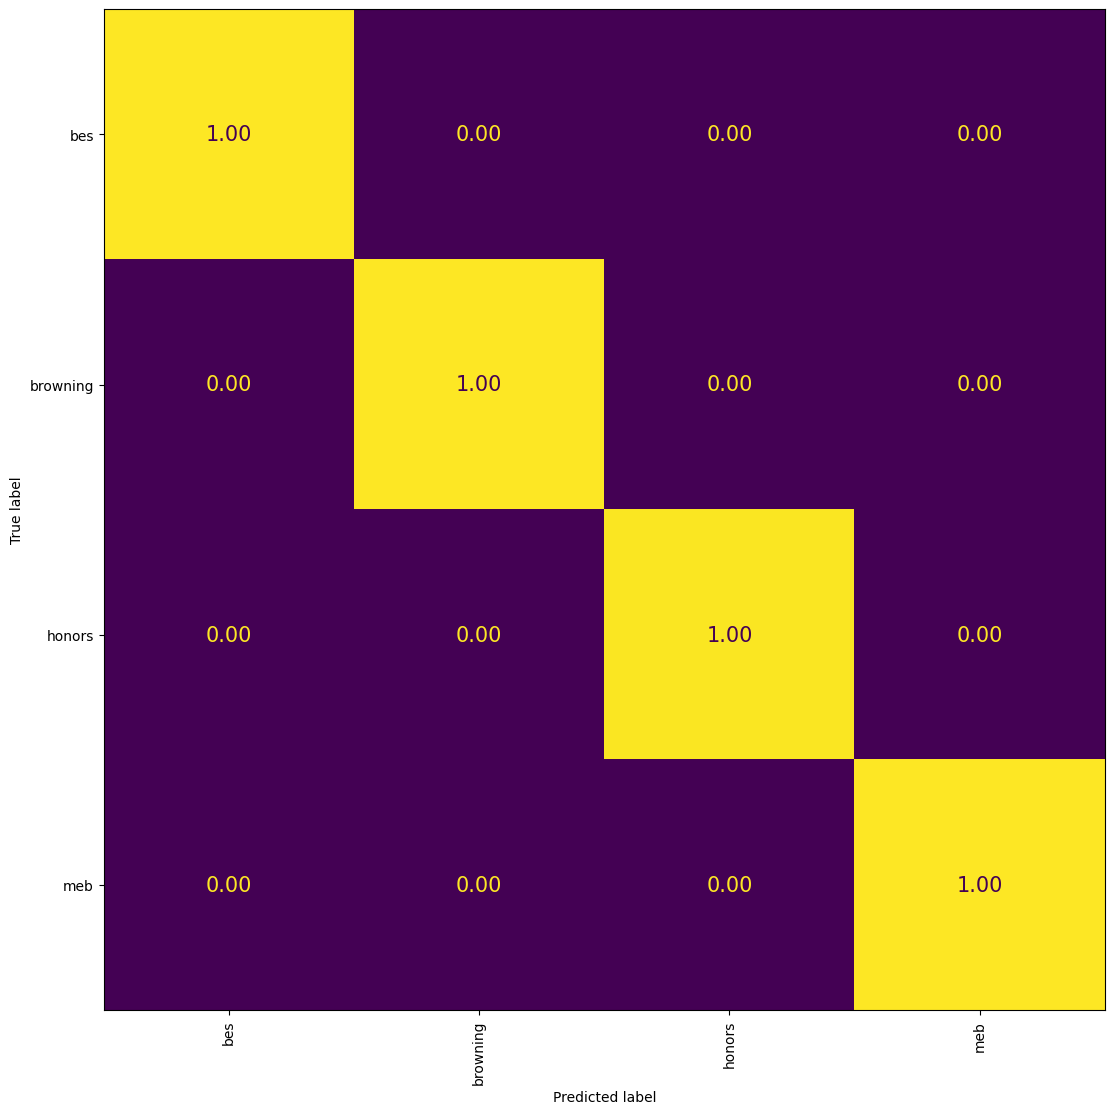

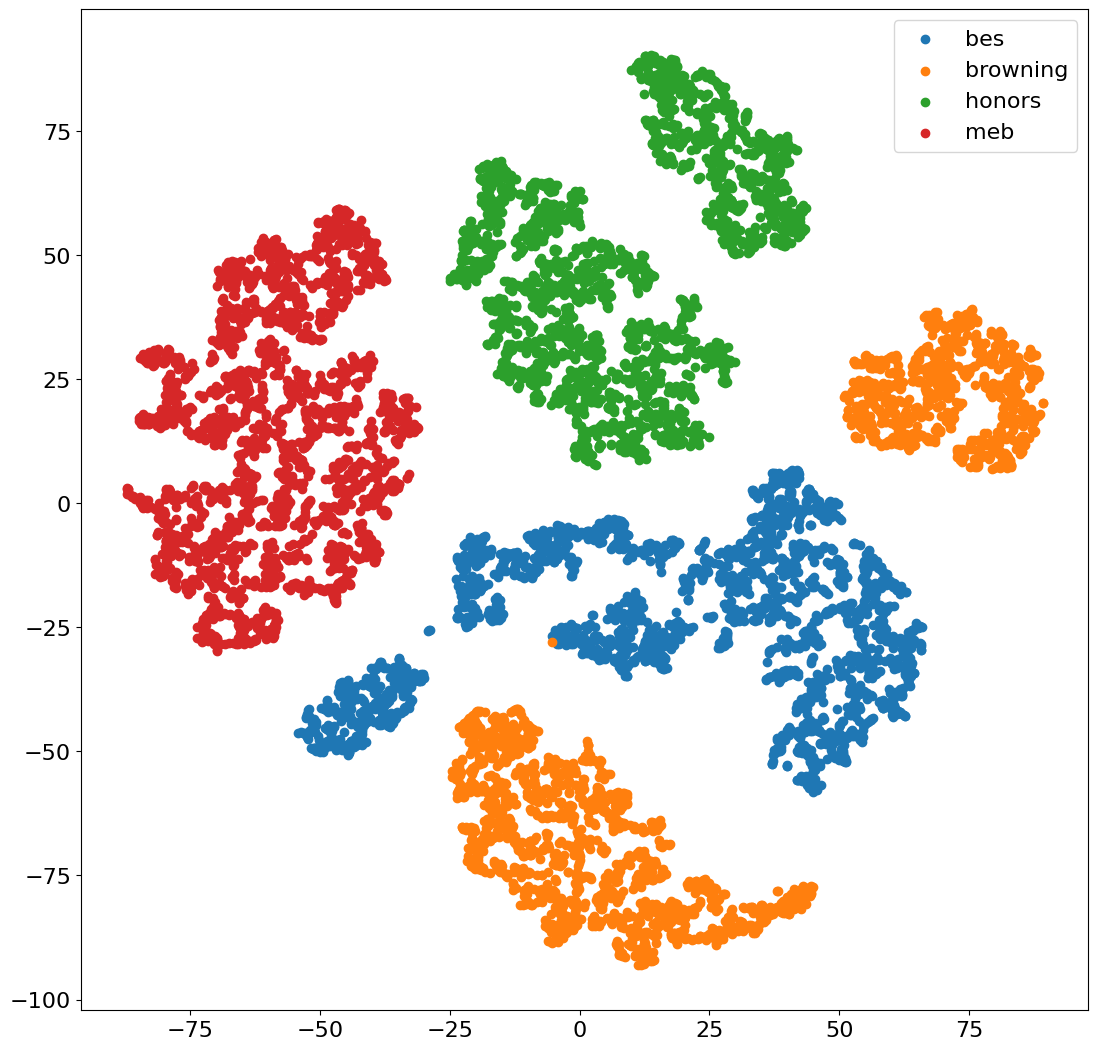

In [5]:
from train import evaluate
model.eval()
results = evaluate(model = model, xtest = xtest, ytest = ytest, batch_sz = 32,savepath = savedir ,device = "cuda", labels = processor.label_encoder.categories_[0]);